# **Basics of logistic regression**

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import statsmodels.api as sn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#load the data
raw_data = pd.read_csv('2.01. Admittance.csv')
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
5,1755,Yes
6,1775,Yes
7,1887,Yes
8,1893,Yes
9,1580,No


In [3]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})

In [4]:
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
5,1755,1
6,1775,1
7,1887,1
8,1893,1
9,1580,0


In [5]:
y = data['Admitted']
x1 = data['SAT']

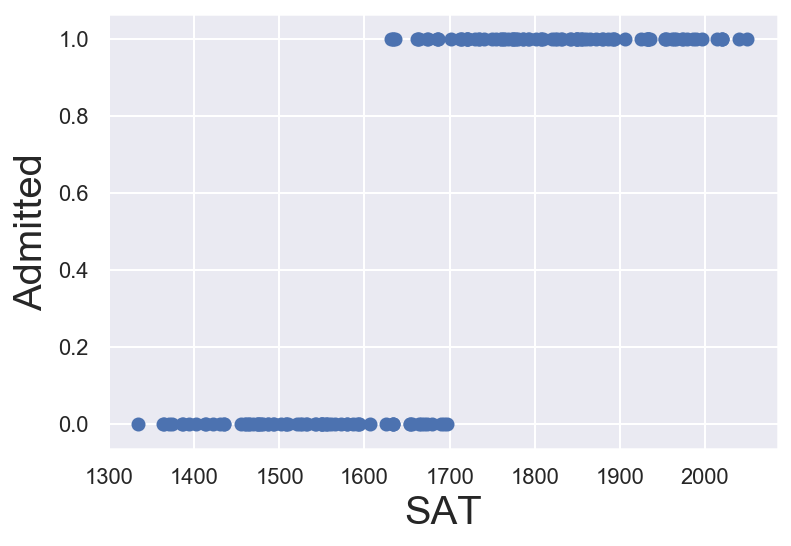

In [9]:
#plotting data on scatter plot
plt.scatter(x1,y, color ='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

/ext/anaconda-2019.03/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


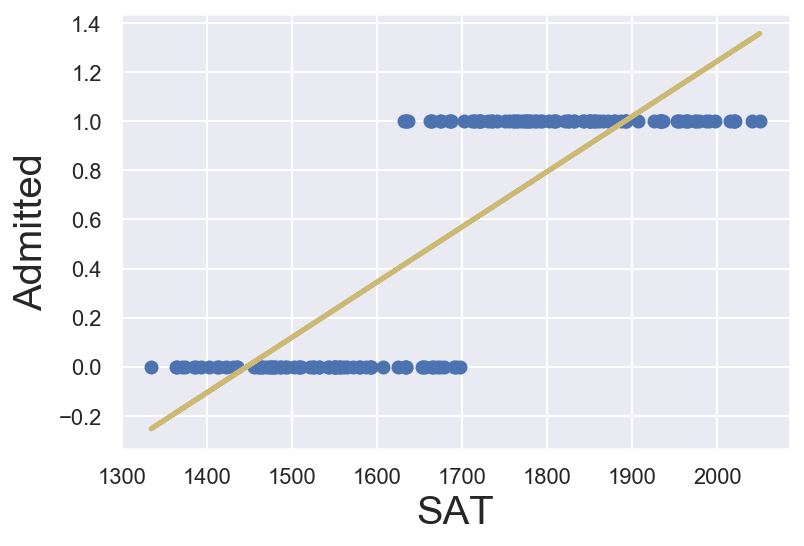

In [11]:
# let's see if linear regression is a fit or not
x = sn.add_constant(x1)
reg_lin = sn.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y, color='C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5, color='C8')
plt.xlabel('SAT', fontsize= 20)
plt.ylabel('Admitted', fontsize= 20)
plt.show()

### **No Way - Awful fit** 

## **Let's plot a logistic regression curve**

In [0]:
reg_log = sn.logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.parans[0], results_log.parans[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize= 20)
plt.plot(x_sorted, f_so)